<AxesSubplot: >

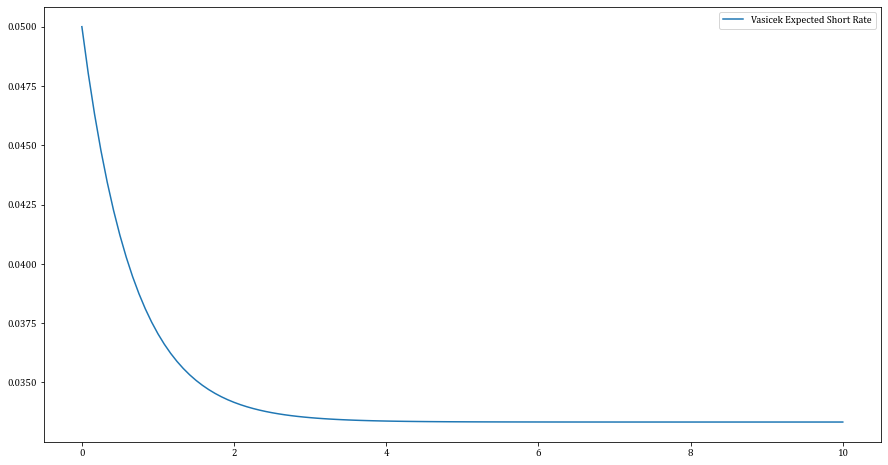

In [30]:
from dynamics import *
import seaborn as sns
import matplotlib.pyplot as plt
#Vasicek model
testDynamic = Vasicek(initial=0.05, mean=0.05, reversion=-1.5, volatility=0.14)
# testDynamic.create_path(stepsize=1/12, duration=15, seed=2023)
plt.figure(figsize=(15,8))
expected = [testDynamic.expectedRate(x) for x in np.arange(0,10*12+1)/12]
sns.lineplot(x=np.arange(0,10*12+1)/12, y=expected, label="Vasicek Expected Short Rate")


<AxesSubplot: >

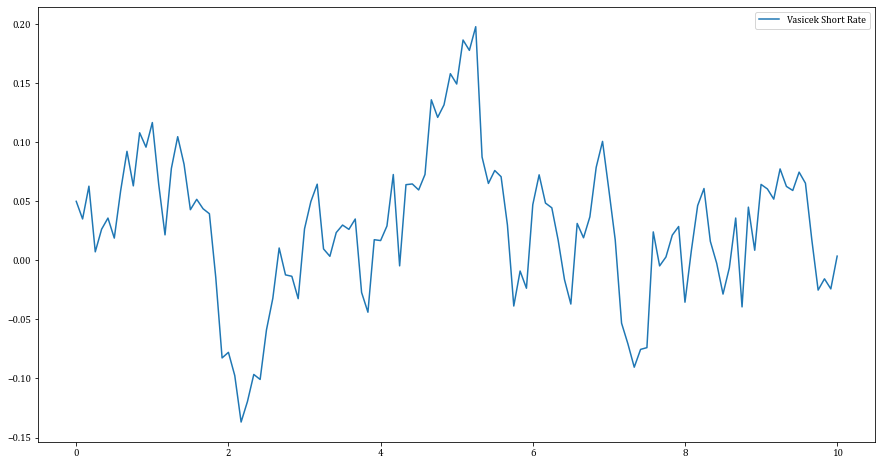

In [33]:
time, rate = testDynamic.create_path(stepsize=1/12, duration=10, seed=1999)
plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=rate, label="Vasicek Short Rate")

In [22]:
rate-np.roll(rate, 1)

array([ 1.00904318e-02, -3.66594489e-03,  8.29674286e-03, -1.52166154e-02,
        5.42411783e-03,  2.87583058e-03, -4.56060498e-03,  1.14879261e-02,
        1.00798038e-02, -7.47552633e-03,  1.33061515e-02, -2.52528558e-03,
        6.68318923e-03, -1.39543542e-02, -1.20743126e-02,  1.57432842e-02,
        8.08484132e-03, -5.97952330e-03, -1.06685803e-02,  2.36418433e-03,
       -2.30756012e-03, -1.33134871e-03, -1.55315991e-02, -2.02992738e-02,
       -1.85835130e-04, -6.97450127e-03, -1.27106314e-02,  3.14500848e-03,
        5.08752141e-03, -2.27694307e-03,  1.09711967e-02,  7.17925460e-03,
        1.20937887e-02, -6.07781826e-03, -2.16538939e-04, -5.31798109e-03,
        1.67485304e-02,  7.17977034e-03,  5.01154506e-03, -1.47497070e-02,
       -1.59962599e-03,  5.83020743e-03,  2.14806804e-03, -6.65217697e-04,
        2.80329715e-03, -1.73878830e-02, -5.17500654e-03,  1.69830084e-02,
        1.09997951e-05,  3.71573017e-03,  1.27732041e-02, -2.12809483e-02,
        1.94662995e-02,  

<AxesSubplot: >

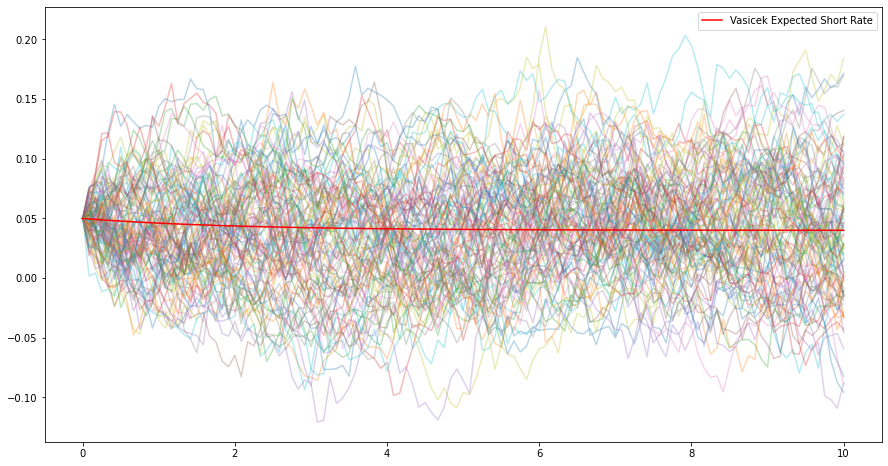

In [3]:
#Some more sims
plt.figure(figsize=(15,8))
for i in range(100):
    time, rate = testDynamic.create_path(stepsize=1/12, duration=10, seed=i)
    sns.lineplot(x=time, y=rate, alpha=0.3)
sns.lineplot(x=time, y=expected, label="Vasicek Expected Short Rate", c='red')

<AxesSubplot: >

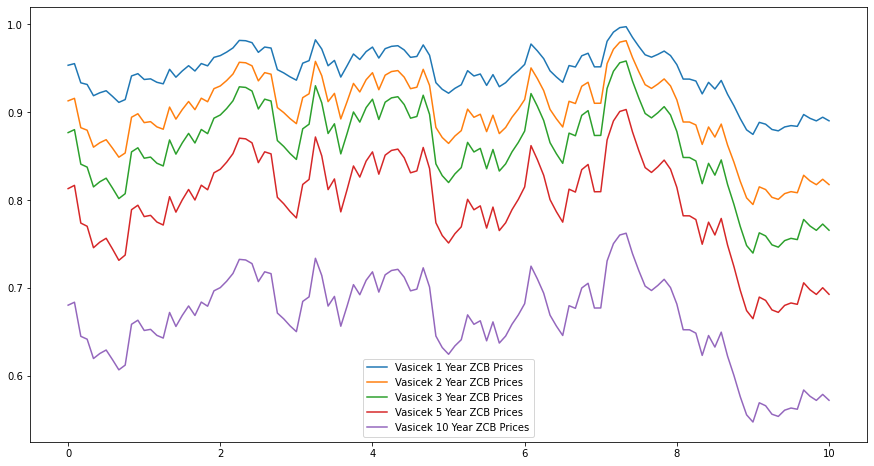

In [4]:
plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=[testDynamic.ZCB(duration=1, time=0, initRate=x) for x in rate], label = "Vasicek 1 Year ZCB Prices")
sns.lineplot(x=time, y=[testDynamic.ZCB(duration=2, time=0, initRate=x) for x in rate], label = "Vasicek 2 Year ZCB Prices")
sns.lineplot(x=time, y=[testDynamic.ZCB(duration=3, time=0, initRate=x) for x in rate], label = "Vasicek 3 Year ZCB Prices")
sns.lineplot(x=time, y=[testDynamic.ZCB(duration=5, time=0, initRate=x) for x in rate], label = "Vasicek 5 Year ZCB Prices")
sns.lineplot(x=time, y=[testDynamic.ZCB(duration=10,time=0 ,initRate=x) for x in rate], label = "Vasicek 10 Year ZCB Prices")

<AxesSubplot: xlabel='Expiry'>

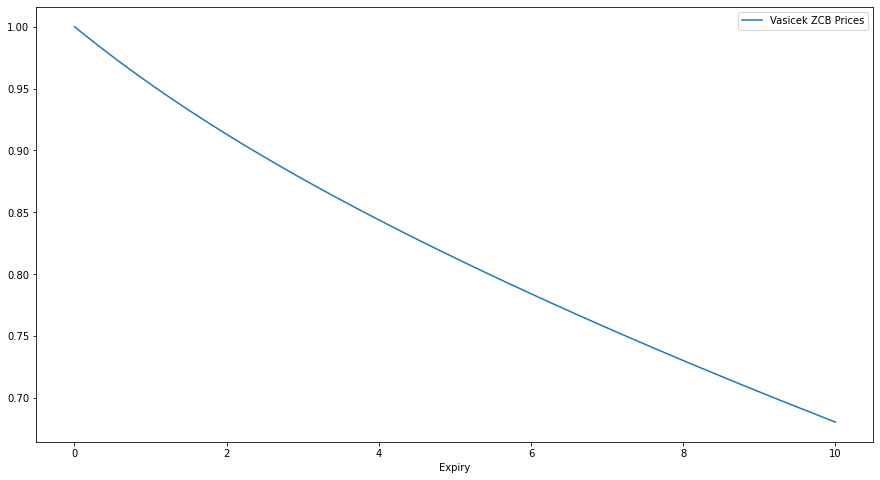

In [5]:
#Zero coupon
plt.figure(figsize=(15,8))
plt.xlabel("Expiry")
sns.lineplot(x=time, y=[testDynamic.ZCB(duration=x,time=0, initRate=0.05) for x in time], label = "Vasicek ZCB Prices")

# Payer Swap testing
For simplicity the fixed and floating payments are equal <br>
The swap is initiated at t=0 and the last swap is made at t=10

<AxesSubplot: >

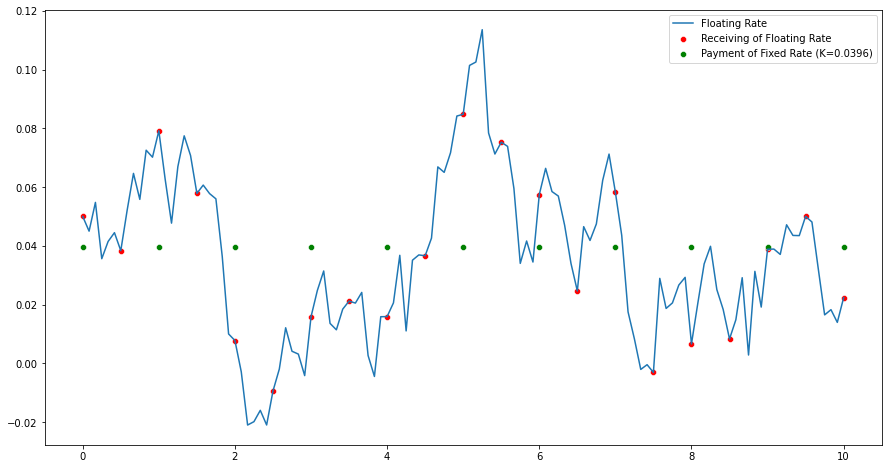

In [6]:
from products import *
from scipy import optimize
fixSchedule = np.arange(0,10+1)
floSchedule = np.arange(0,20+1)/2
time, floatRate = testDynamic.create_path(1/12, 10, 1999)
# (Non analytical way to find par swap rate)
K = parSwapRate(
    fixedSchedule=fixSchedule, 
    floatingSchedule=floSchedule,
    time=0,
    rate=testDynamic.init, 
    model=testDynamic)
plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=floatRate, label='Floating Rate')
sns.scatterplot(x=floSchedule, y=floatRate[0::6], label='Receiving of Floating Rate', c='red')
sns.scatterplot(x=fixSchedule, y=np.repeat(K, len(fixSchedule)), label=f'Payment of Fixed Rate (K={round(K,4)})', c='green')

<AxesSubplot: >

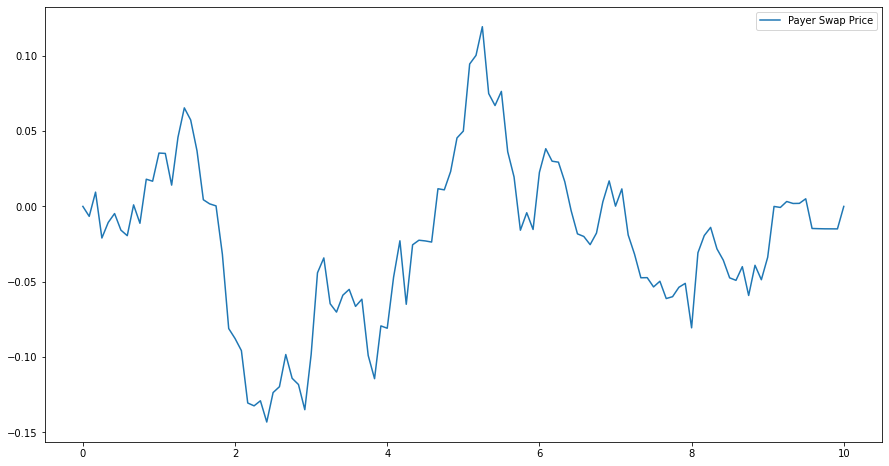

In [7]:
payerSwapPrice = [
payerSwap(
    time=x, 
    fixedSchedule=fixSchedule, 
    floatingSchedule=floSchedule, 
    fixedRate=K, 
    floatingRate=floatRate, 
    floatingTimeStamp=time,
    model=testDynamic
)
for x in time
]

plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=payerSwapPrice, label='Payer Swap Price')

<AxesSubplot: >

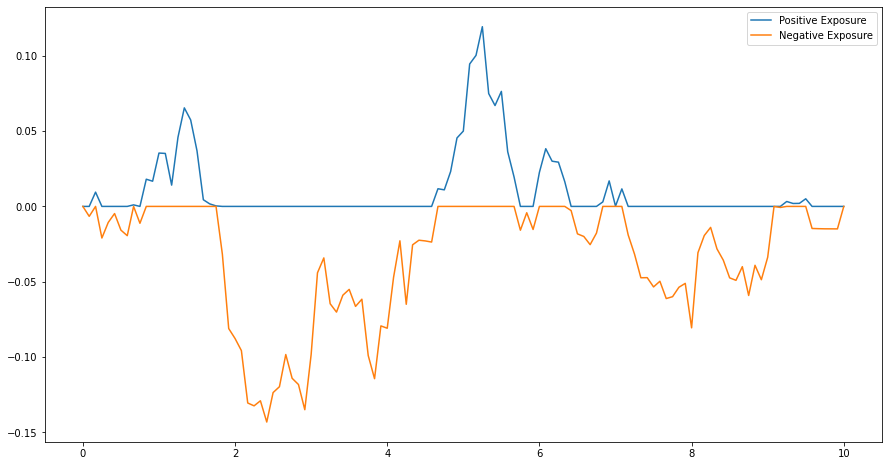

In [8]:
plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=np.maximum(payerSwapPrice,0), label='Positive Exposure')
sns.lineplot(x=time, y=np.minimum(np.array(payerSwapPrice),0), label='Negative Exposure')

In [9]:
for i in range(1,len(floSchedule)):
    print(testDynamic.ZCB(floSchedule[i-1])>testDynamic.ZCB(floSchedule[i], time = 0))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [14]:
sims = 15*np.power(10,2)
years=10
dt=1/360
EPE = np.zeros(int(years/dt+1))
ENE = np.zeros(int(years/dt+1))
K = parSwapRate(
    fixedSchedule=fixSchedule, 
    floatingSchedule=floSchedule,
    time=0,
    rate=testDynamic.init, 
    model=testDynamic)
time, floatRate = testDynamic.create_path(stepsize=dt, duration=years, seed=0)
discounting = np.array([testDynamic.ZCB(x) for x in time])
# K = 0.05
for i in range(sims):
    # print(i, end='\r')
    fixSchedule = np.arange(0,10+1)
    floSchedule = np.arange(0,20+1)/2
    time, floatRate = testDynamic.create_path(stepsize=dt, duration=years, seed=i)
    payerSwapPrice=[
    payerSwap(
        time=x, 
        fixedSchedule=fixSchedule, 
        floatingSchedule=floSchedule, 
        fixedRate=K, 
        floatingRate=floatRate, 
        floatingTimeStamp=time,
        model=testDynamic
    )
    for x in time
    ]

    posExposure = np.maximum(payerSwapPrice, 0) * discounting
    negExposure = np.minimum(payerSwapPrice, 0) * discounting

    EPE += posExposure
    ENE += negExposure
    print('Process: {:0.2f}%'.format(np.round((i+1)/sims*100,2)), end='\r')

# I guess this should be the plotsetup :)

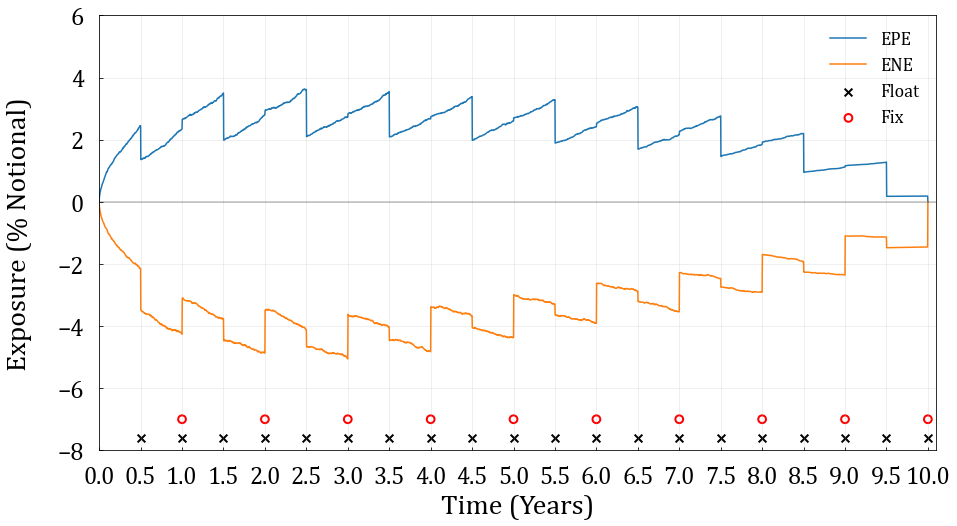

In [16]:
# import matplotlib as mpl  #Det her er haram
# mpl.rc('font',family='Cambria')
plt.rc('font',family='Cambria')
float_x = np.arange(0.5,10.5,0.5)
float_y = np.full((len(float_x),), -7.6)
fix_x = np.arange(1,11)
fix_y = np.full(len(fix_x), -7)

fig, ax = plt.subplots()
sns.lineplot(x=time, y=EPE/sims*100, label = 'EPE')
sns.lineplot(x=time, y=ENE/sims*100, label = 'ENE')
plt.scatter(x=float_x, y=float_y, label = 'Float', marker = 'x', s = 60, c='black', linewidths=2)
plt.scatter(x=fix_x, y=fix_y, label = 'Fix', marker = 'o', s = 60, facecolors='none', edgecolors='r', linewidths=2)
fig.set_size_inches(15,8)
ax.set_ylim(-8,6)
ax.set_xlim(0,10.1)
ax.set_xlabel('Time (Years)', fontname="Cambria", fontsize = 28)
ax.set_ylabel('Exposure (% Notional)', fontname="Cambria", fontsize = 28)
ax.tick_params(axis='x', direction='in', right = 'True', labelsize = 24, pad = 15)
ax.tick_params(axis='y', direction='in', top = 'True', labelsize = 24, pad = 15)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.axhline(y=0, color='k', alpha = 0.25)
plt.grid(alpha = 0.25)
plt.xticks(np.arange(0, 10.5, 0.5))
plt.legend(frameon = False, fontsize = 18, loc='upper right')
plt.savefig('Exposure_Plot_10YPayer_Swap', bbox_inches='tight')


## CVA calc with constant intensity

In [12]:
# Default intensity
lc = 0.05
li = 0.01

def survival(intensity, duration):
    return np.exp(-intensity*duration)

Sc = np.array([survival(lc, x) for x in time])

Si = np.array([survival(li, x) for x in time])

dQc=-np.diff(np.insert(Sc, 0, 1))

dQi=-np.diff(np.insert(Si, 0, 1))

LGDc=1
LGDi=1

In [13]:
CVA = -LGDc*sum(Si*dQc*EPE/sims)
DVA = -LGDi*sum(Sc*dQi*ENE/sims)
print('CVA (% Notional):', CVA*100,', DVA (% Notional):', DVA*100)

CVA (% Notional): -0.9804067018513773 , DVA (% Notional): 0.2930094794960718


<!-- Swaption testing, parswap virker kommer ik lige længere pt -->
# Hvorfor er en ny parswap funktion? Virkede den anden ikke?
# I stedet for at lave en ny så hellere fikse det vi har, vi kan altid gå tilbage hvis vi fikser forkert. 

In [154]:
def parswap(time, fixSchedule, floSchedule, floatRate, timestamp):
    top = 0
    bot = 0
    rate = floatRate[np.where(timestamp==time)][0]
    for j in range(1, len(floSchedule)):
        Tj  = floSchedule[j]   # T_j
        Tjm = floSchedule[j-1] # T_{j-1}
        if Tj >= time:
            if Tjm <= time:
                nt = find_nearest(timestamp, Tjm)  #nearest time (by construction it should be exactly equal but decimals and such can fuck it up)
                rjm = floatRate[np.where(timestamp==nt)][0]   #rate at time Tjm
                F = (1/testDynamic.ZCB(duration=Tj-Tjm, initRate=rjm)-1)/(Tj-Tjm) # ZCB functionen er ændret så den tager duration, time og initRate

            else: 
                F = testDynamic.forward_rate(time=time, start=Tjm, end=Tj, initRate=rate)

            D = testDynamic.ZCB(duration=Tj-time, initRate=rate)
            top += D*F*(Tj-Tjm)
        
    for i in range(1, len(fixSchedule)):
        Si  = fixSchedule[i]   # S_j
        Sim = fixSchedule[i-1] # S_{j-1}

        if Si >= time:
            D = testDynamic.ZCB(duration=Si-time, initRate=rate)
            bot += D*(Si-Sim)

    return top/bot

In [220]:
sim = 1000
parswaps = []
Te = 5
K = 0.05
for i in range(sim):
    times, floatRate = testDynamic.create_path(1/12, 10, i)
    par = parswap(time = Te, fixSchedule=fixSchedule, floSchedule=floSchedule, floatRate=floatRate, timestamp=times)
    parswaps.append(par)

parswaps = np.array(parswaps)
optionality = np.maximum(parswaps-K, 0)
optionality

# Gør ik hvad jeg vil

In [213]:
def swaption(time, parswap, K, fixedSchedule, timestamp, floatrate):
    A = 0
    r = floatrate[np.where(timestamp==time)][0]
    for i in range(1,len(fixedSchedule)):
        Si  = fixedSchedule[i]   # S_j
        Sim = fixedSchedule[i-1] # S_{j-1}

        if Si >= time:
            D = testDynamic.ZCB(duration=Si-time, initRate=r)
            A += D*(Si-Sim)

    optionality = np.maximum(parswap-K, 0)
    return optionality*A

In [215]:
sim = 1000
options = []
Te = 5
K = 0.05
for i in range(sim):
    times, floatRate = testDynamic.create_path(1/12, 10, i)
    par = parswap(time = Te, fixSchedule=fixSchedule, floSchedule=floSchedule, floatRate=floatRate, timestamp=times)
    for j in times:
        opt = swaption(j, par, K, fixSchedule, times, floatRate)
        options.append(opt)

In [216]:
options = []
Te = 5
K = 0.03
times, floatRate = testDynamic.create_path(1/12, 10, 1999)
par = parswap(
    time = Te, 
    fixSchedule=fixSchedule, 
    floSchedule=floSchedule, floatRate=floatRate, timestamp=times)
for j in times:
    opt = swaption(j, par, K, fixSchedule, times, floatRate)
    options.append(opt)